# SGDClassifier, loss = hinge

In [1]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [2]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [3]:
# Initialize the Logistic Regression model with adjusted hyperparameters
sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', max_iter=250000, tol=1e-3, learning_rate='optimal')

# Train the model on the scaled training data
sgd_classifier.fit(X_train, y_train)

SGDClassifier(max_iter=250000)

In [4]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [5]:
y_pred = sgd_classifier.predict(X_test)

Eval_sgd_classifier =classification_task(sgd_classifier, X_train, y_train ,X_test, y_test, y_pred,'SGD Classifier')
Eval_sgd_classifier

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
SGD Classifier,0.831836,0.829807,0.803784,0.829807,0.801358,0.829807


Accuracy: 0.83


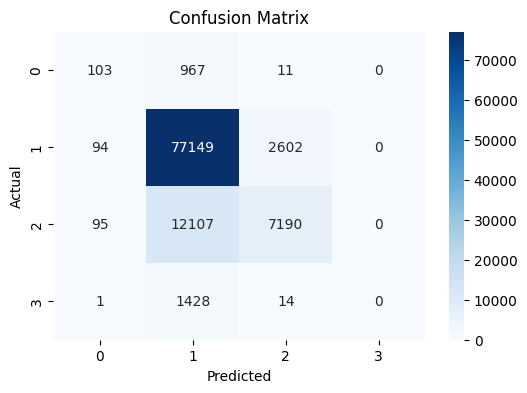

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.10      0.15      1081
           1       0.84      0.97      0.90     79845
           2       0.73      0.37      0.49     19392
           3       0.00      0.00      0.00      1443

    accuracy                           0.83    101761
   macro avg       0.48      0.36      0.39    101761
weighted avg       0.80      0.83      0.80    101761



In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)